# Evaluation: Precision & Recall

Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics.

We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 

In [1]:
# Libraries
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
# Load data
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

#### Now take a look at the shapes of the X and y matrices.

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

#### Let's pick one entry and see what number is written. Use indexing to pick the 36000th digit.

In [5]:
y[36000]

'9'

####  Use the *reshape(28,28)* method and *plt.imshow()* function with the parameters *cmap = matplotlib.cm.binary* and *interpolation="nearest"* to make a plot of the number. Be sure to import matplotlib.

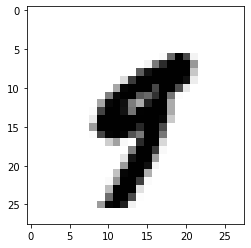

In [6]:
# your code here
import matplotlib.pyplot as plt

data = X[36000].reshape(28,28)
data.shape

plt.imshow(data,cmap=plt.cm.binary, interpolation='nearest')
plt.show()

#### Use indexing to see if what the plot shows matches with the outcome of the 36000th index.

In [7]:
# your code here
y[36000]

'9'

#### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training and the rest for testing.

In [8]:
numbers_X_train = X[:60000]
numbers_X_test = X[60000:]

numbers_y_train = y[:60000]
numbers_y_test = y[60000:]

In [9]:
numbers_y_test

array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

#### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5.

In [10]:
# your code here
numbers_y_test_5 = np.where(numbers_y_test == '5',1,0)
numbers_y_train_5 = np.where(numbers_y_train == '5',1,0)

#### Lets train a logistic regression to predict if a number is a 5 or not. Remember to use the 'just 5s' target train array.

In [11]:
# your code here

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear')
clf.fit(numbers_X_train, numbers_y_train_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

#### Does the classifier predict correctly the 36000th digit we picked before?

In [12]:
# your code here

y_predict = clf.predict(numbers_X_train)

In [13]:
y_predict[36000]

0

# your comments here:

**It works, because initially the 36000th was a '9', and if a number its not a '5', I applied to conversion to 0**

#### The 35th value is a 5. Check if it was correctly predicted.

In [14]:
# your code here

y_predict[35]

1

# your comments here:

**It works, because the '5' numbers, is a 1 value**

#### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below.

In [15]:
# Libraries
from sklearn.base import BaseEstimator

In [16]:
# Dumb classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1))[:, 0]

never_5_clf = Never5Classifier()

#### Now lets fit and predict on the testing set using our dumb classifier.

In [18]:
# your code here
model_never5 = never_5_clf.fit(numbers_X_train,numbers_y_train)
y_predumb=never_5_clf.predict(numbers_X_test)

In [19]:
y_predumb

array([0., 0., 0., ..., 0., 0., 0.])

#### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

**LOGISTIC REGRESSION**

In [20]:
# your code here

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


y_predict = clf.predict(numbers_X_test)

confusion = confusion_matrix(numbers_y_test_5, y_predict)


precision = precision_score(numbers_y_test_5, y_predict)
recall = recall_score(numbers_y_test_5, y_predict)
f1_score = f1_score(numbers_y_test_5, y_predict)

print(f'''
LOGISTIC REGRESSION

confusion: 
{confusion}

precission: {precision}

recall: {recall}

f1_score: {f1_score}
''')


LOGISTIC REGRESSION

confusion: 
[[9026   82]
 [ 145  747]]

precission: 0.9010856453558505

recall: 0.8374439461883408

f1_score: 0.8680999418942476



array(['7', '2', '1', ..., '4', '5', '6'], dtype=object)

In [23]:
y_predict = clf.predict(numbers_X_test)

#confusion = confusion_matrix(numbers_y_test, y_predumb)


precision = precision_score(numbers_y_test, y_predumb)
recall = recall_score(numbers_y_test, y_predumb)
f1_score = f1_score(numbers_y_test, y_predumb)

print(f'''
DUMB CLASSIFICATION

#confusion: 
#{confusion}

precission: {precision}

recall: {recall}

f1_score: {f1_score}
''')

ValueError: Mix of label input types (string and number)

#### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# your answer here

#### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each.

In [ ]:
# your code here

#### Now find the roc_auc_score for each. 

In [ ]:
# your code here

#### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# your answer here